In [1]:
import pandas as pd
import re
import unicodedata

In [8]:
df = pd.read_csv('mapa.csv', sep=';')
df = df.fillna('')

In [9]:
# Optional 'r$', matching digits afterwards
value_pattern_str = r"^(r\$)?\s?[1-9]\d{0,2}(\.\d{3})*,\d{2}$"
value_pattern = re.compile(value_pattern_str)

def format_prices(s):
    t = s.lower()
    if 'alimento' in t:
        return "ALIMENTO"
    elif 'meia' in t or 'inteira' in t or 'e r$' in t:
        return "INTEIRA E MEIA"
    elif 'fralda' in t or 'brinquedo' in t or 'pacote' in t:
        return "DOAÇÃO"
    elif 'gratuito' in t:
        return "GRATUITO"
    elif value_pattern.match(t):
        return "PAGO"
    else:
        return "OUTRO"

# Copy main DataFrame to analyse prices
price_df = df[['price']].copy()
price_df = price_df[price_df.price.apply(lambda x: bool(value_pattern.match(x)))]
price_df['price'] = price_df['price'].apply(lambda x: int(re.sub(r"\D", "", x)) / 100)
# Clean absurd values
price_df = price_df[price_df['price'] != 99999.99]

df['price'] = df['price'].apply(format_prices)


In [10]:
df

,id,startsOn,until,price,spaceId,name,shortDescription,classificacaoEtaria,singleUrl,subTitle,registrationInfo,avatar,terms.tag,terms.linguagem
0,4394,2012-01-10,,GRATUITO,1671,TWINDOW,“ Twindow” é uma tentativa de comunicação text...,Livre,https://mapacultural.secult.ce.gov.br/evento/4...,,,https://mapacultural.secult.ce.gov.br/files/ev...,,Artes Integradas
1,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
2,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
3,2266,2012-01-28,2012-02-11,PAGO,1304,Reino Folia - Pré-Carnaval Álvaro Weyne 2012,"O Bloco Reino Folia, nasceu, assim como outros...",16 anos,https://mapacultural.secult.ce.gov.br/evento/2...,Bloco de Carnaval de Rua do Álvaro Weyne,O evento contou com o apoio da Prefeitura de F...,https://mapacultural.secult.ce.gov.br/files/ev...,,Cultura Tradicional
4,6157,2012-04-19,,GRATUITO,2979,5o. Abril pra Angola : no caminho da ancestral...,Evento tradicional realizado pelo centro cult...,Livre,https://mapacultural.secult.ce.gov.br/evento/6...,,,,,Artes Integradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro
12855,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro
12856,7239,2021-10-13,2023-12-27,GRATUITO,1636,Cururu Skate e Rap - A batalha.,Batalha de rap que ocorre todas as quartas fei...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,Batalha de mc's e evento cultural.,GRATUITA.,https://mapacultural.secult.ce.gov.br/files/ev...,,Hip Hop
12857,7046,2021-06-24,2021-12-31,GRATUITO,5391,A DESCOBERTA ALÉM DO ALCANCE DE GEORGIA GABRIE...,EXPERIMENTA!\r\n\r\nI MOSTRA DE EXPERIMENTOS C...,Livre,https://mapacultural.secult.ce.gov.br/evento/7...,A descoberta além do alcance de Georgia Gabrie...,,https://mapacultural.secult.ce.gov.br/files/ev...,,Teatro


In [11]:
price_df

,price
1,5.0
2,5.0
3,5.0
10,10.0
11,10.0
...,...
12802,2000.0
12820,2000.0
12825,50.0
12833,2000.0


In [12]:
print("Eventos pagos:")
print("Média de valor:", price_df['price'].mean())
print("Mediana de valor:", price_df['price'].median())
print("Desvio absoluto médio:", price_df['price'].mad())
print("Variância de valor:", price_df['price'].var())
print("Desvio padrão de valor:", price_df['price'].std())

Eventos pagos:
Média de valor: 160.72396694214876
Mediana de valor: 20.0
Desvio absoluto médio: 268.71635544020216
Variância de valor: 266184.08427562803
Desvio padrão de valor: 515.9303095144033


<AxesSubplot:>

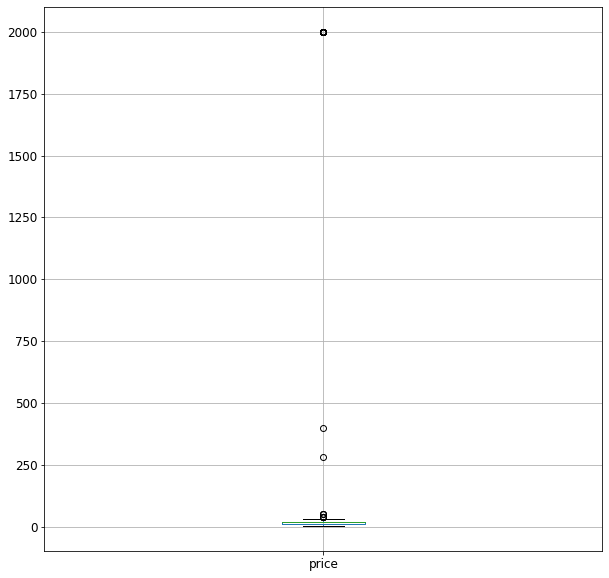

In [13]:
price_df.boxplot(column=['price'], fontsize='large', figsize=(10,10))